In [6]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [10]:
df=sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [21]:
df.shape

(398, 9)

In [19]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [20]:
df.dtypes.value_counts()


float64    4
int64      3
object     2
dtype: int64

In [22]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [25]:
df.duplicated().sum()

0

<Axes: >

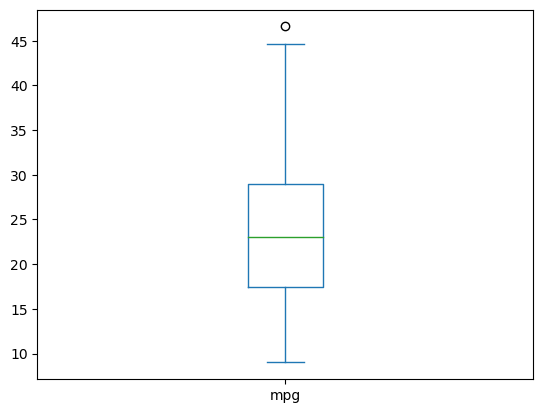

In [95]:
df.mpg.plot(kind='box')

In [16]:
df[df.mpg>(q3+1.5*iqr)]  # gives the outlier

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
322,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda glc


In [17]:
df[df.mpg<(q1-1.5*iqr)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name


In [26]:
df.isna().sum()/len(df)*100

mpg             0.000000
cylinders       0.000000
displacement    0.000000
horsepower      1.507538
weight          0.000000
acceleration    0.000000
model_year      0.000000
origin          0.000000
name            0.000000
dtype: float64

Null values are present only in the Horsepower column and more over they account only for 1.5% of the values so if needed we can remove then becausse they represent only 1.5% f the values

In [89]:
d=df.dropna()

In [82]:
d.isna().sum()/len(df)*100

mpg             0.0
cylinders       0.0
displacement    0.0
horsepower      0.0
weight          0.0
acceleration    0.0
model_year      0.0
origin          0.0
name            0.0
dtype: float64

In [84]:
d.shape

(392, 9)

In [85]:
d.weight.unique().shape

(346,)

More over each car have their own unique name so we can remove that for further analysis

In [90]:
d.drop(columns=['name'],axis=1,inplace=True)
d.head()

C:\Users\jayan\AppData\Local\Temp\ipykernel_10180\3055024772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.drop(columns=['name'],axis=1,inplace=True)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [91]:
for i in d.columns:
    print(i,len(d[i].unique()))

mpg 127
cylinders 5
displacement 81
horsepower 93
weight 346
acceleration 95
model_year 13
origin 3


<Figure size 200x200 with 0 Axes>

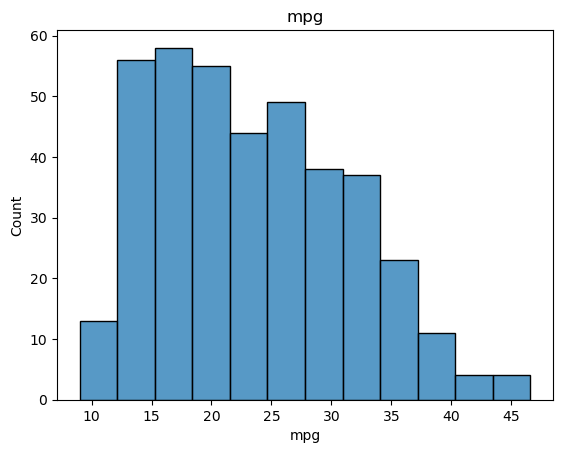

<Figure size 200x200 with 0 Axes>

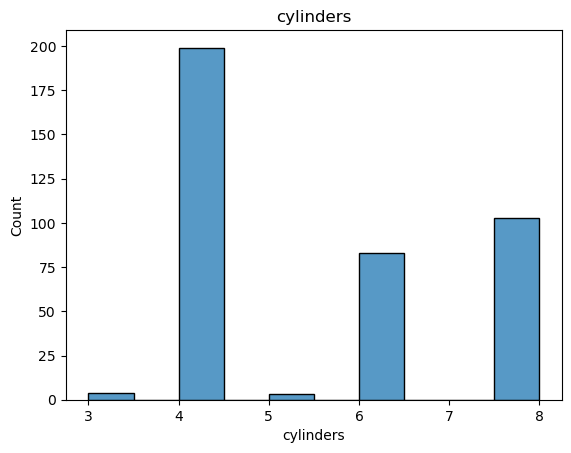

<Figure size 200x200 with 0 Axes>

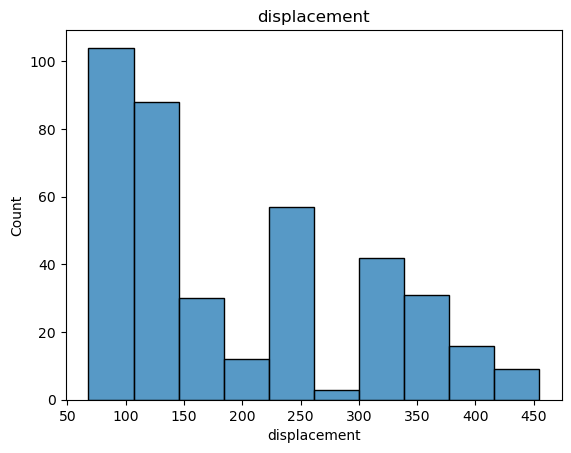

<Figure size 200x200 with 0 Axes>

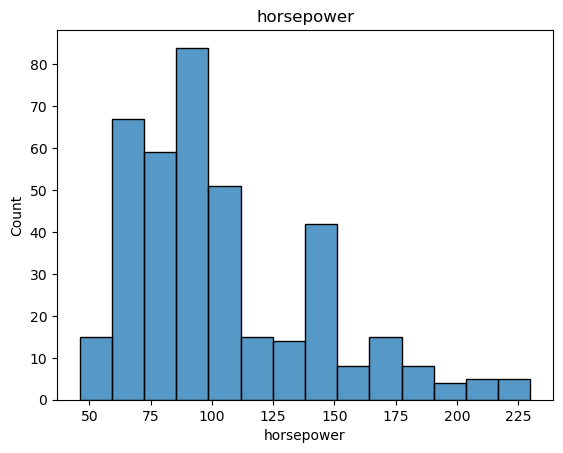

<Figure size 200x200 with 0 Axes>

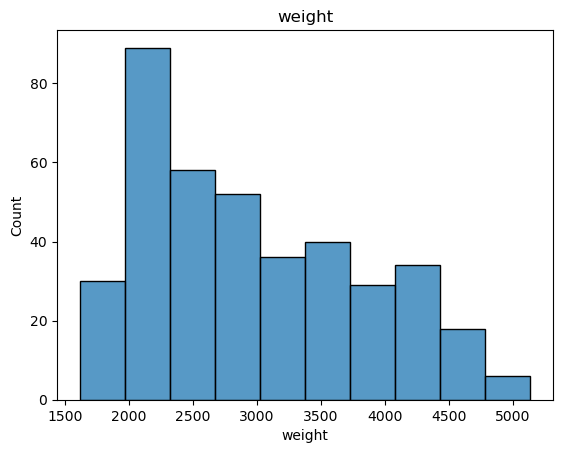

<Figure size 200x200 with 0 Axes>

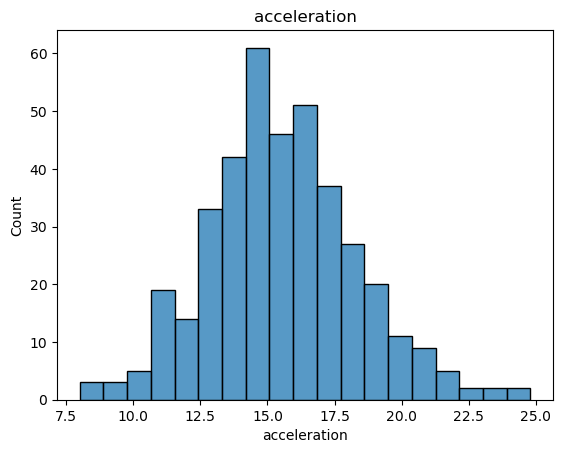

<Figure size 200x200 with 0 Axes>

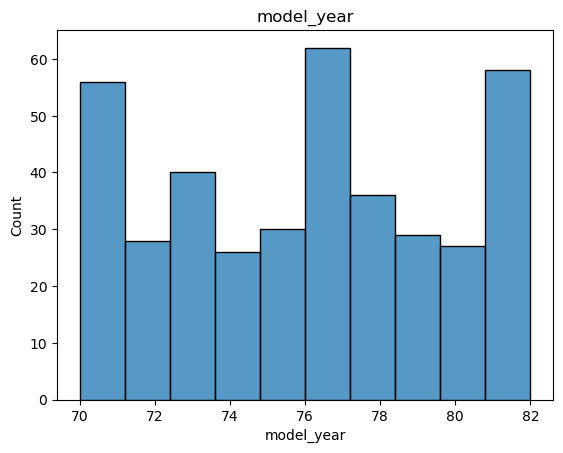

<Figure size 200x200 with 0 Axes>

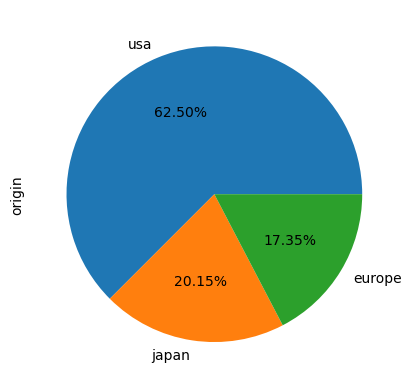

In [112]:
for i in d.columns:
    plt.figure(figsize=(2,2))
    ax=plt.subplots(1,1)
    if d[i].dtypes=='object':
        d[i].value_counts().plot(kind='pie',autopct='%0.2f%%')
        plt.show()
    else:
        sns.histplot(d[i])
        plt.title(i)
        plt.show()

<Axes: ylabel='cylinders'>

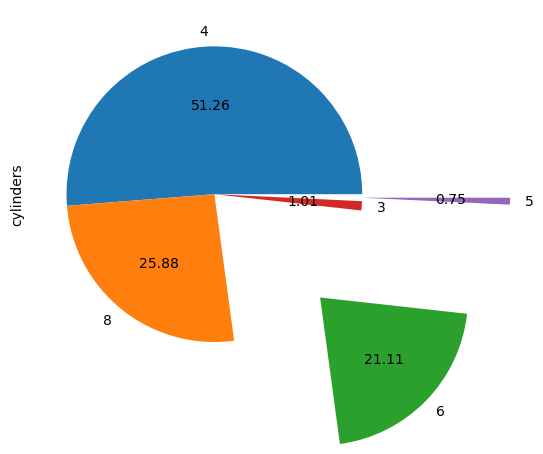

In [98]:
df.cylinders.value_counts().plot(kind='pie',autopct='%.2f',explode=[0,0,1,0,1])

In [97]:
df.cylinders.value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

Four cylinders account for the major proposition,
then come the 8 culinder

<Figure size 200x200 with 0 Axes>

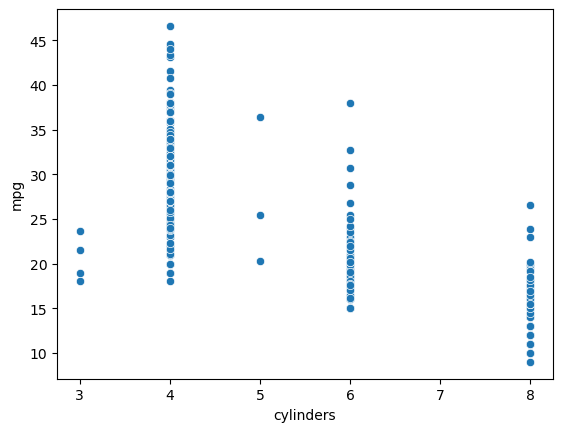

<Figure size 200x200 with 0 Axes>

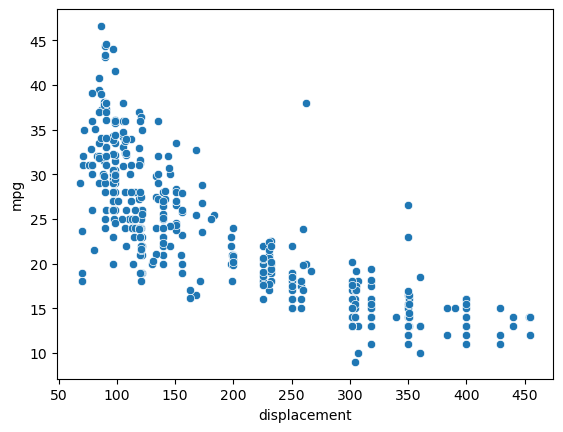

<Figure size 200x200 with 0 Axes>

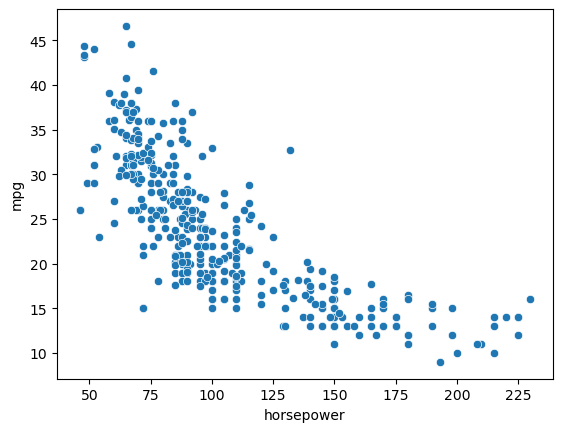

<Figure size 200x200 with 0 Axes>

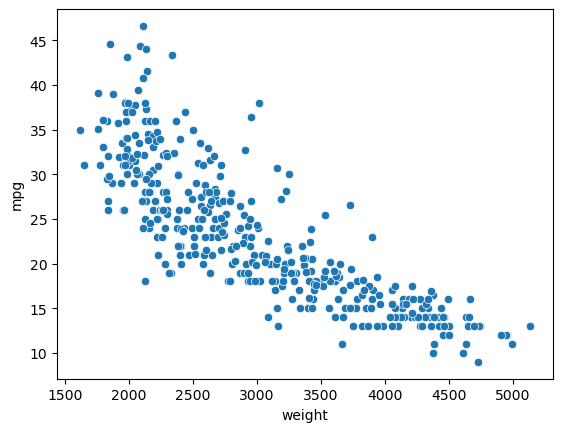

<Figure size 200x200 with 0 Axes>

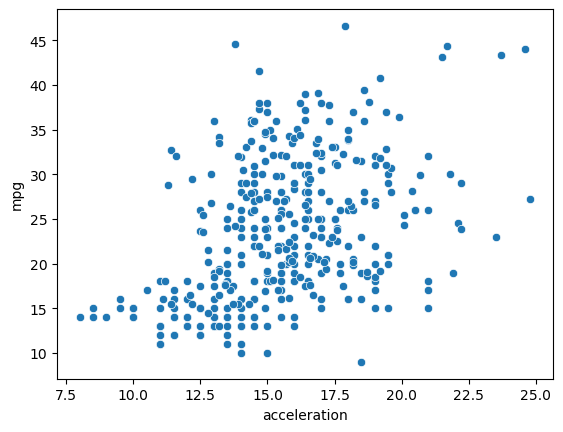

<Figure size 200x200 with 0 Axes>

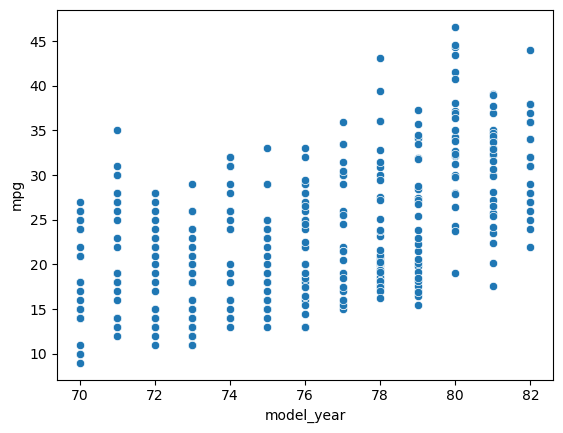

<Figure size 200x200 with 0 Axes>

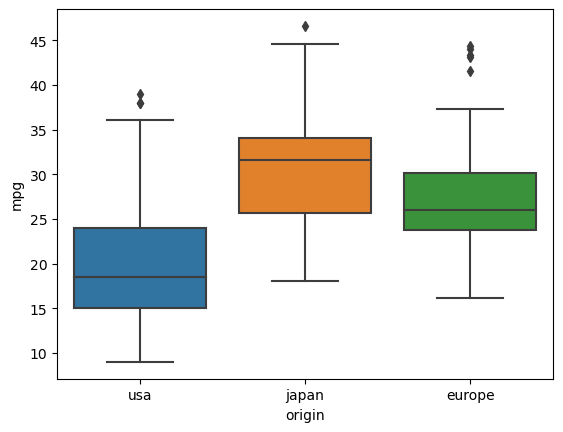

In [120]:
#bivariate analysis:
for i in d.drop(columns='mpg'):
    plt.figure(figsize=(2,2))
    ax=plt.subplots(1,1)
    if (d[i].dtypes=='object'):
        sns.boxplot(x=d[i],y=d['mpg'])
    else:
        sns.scatterplot(x=d[i],y=d['mpg'])

# Insights:

As we can see as weight,horsepower,displacement increasea milage also gets droped

We can say that the mpg has shown an increase over a period of time, We can say that thismay be due to technological advancements

We can observe that mpg and acceleration have no relation, there is no linear relatioin between them

<Axes: xlabel='origin', ylabel='mpg'>

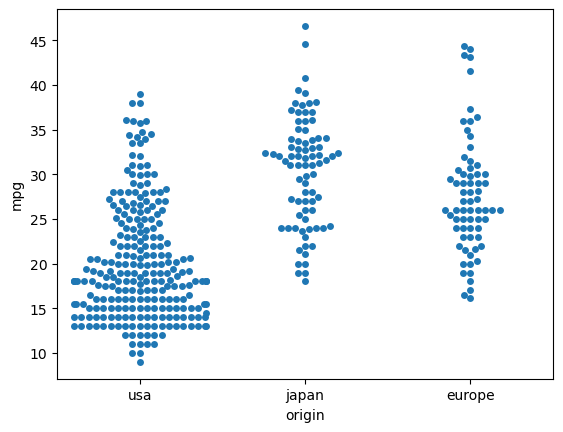

In [109]:
sns.swarmplot(x=d.origin,y=d.mpg) 

As we can see most of the vehicle produced in USA have less mpg compared to vehicles produced in Japan and Europe

Japan on the other hand produces better mpg vehicles 

<Axes: xlabel='origin', ylabel='mpg'>

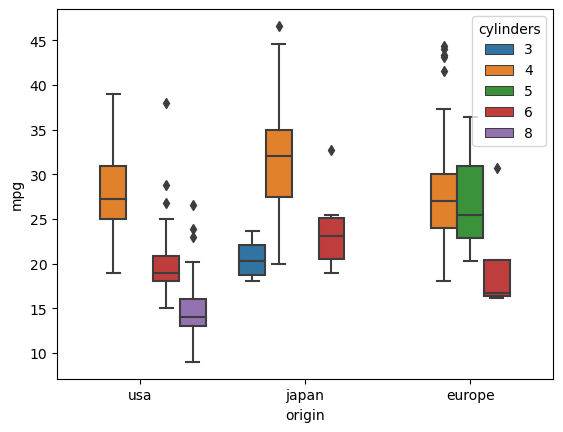

In [111]:
sns.boxplot(x=d.origin,y=d.mpg,hue=d.cylinders)

We can see that all the 8 cylinders are manufactured only in USA and 5cylinders are only manufactured in Germany and only Japan produces 3 cylinder

While considering 4 cylinder engine all 3 countries produce but Japan's engine seems to give more mpg , followed by USA and Germany